## Problem Statement

Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic dataset from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from pandas import Series,DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [10]:
url ='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [11]:
titanic = pd.read_csv(url)

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
X = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare']]

In [15]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [16]:
y = titanic['Survived']

In [18]:
X.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [19]:
X['Age'].fillna(X['Age'].mean(),inplace=True)

C:\Users\MOHAN\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [21]:
X.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [22]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


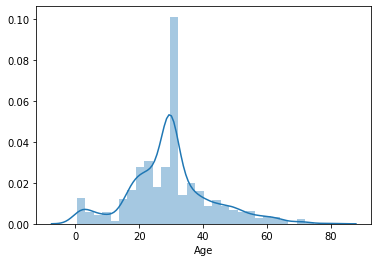

In [31]:
sns.distplot(X['Age'])

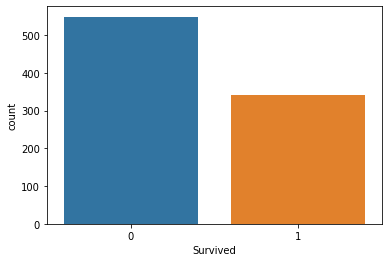

In [32]:
sns.countplot(y)

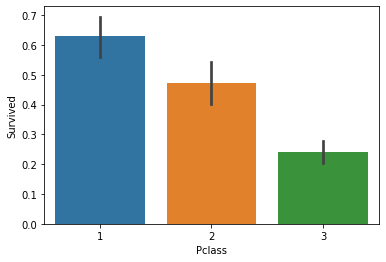

In [35]:
sns.barplot(X['Pclass'],y)

In [36]:
X['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [37]:
X['sex_dummy'] = pd.get_dummies(X['Sex'],drop_first=True)

C:\Users\MOHAN\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,sex_dummy
0,3,male,22.0,1,0,7.2500,1
1,1,female,38.0,1,0,71.2833,0
2,3,female,26.0,0,0,7.9250,0
3,1,female,35.0,1,0,53.1000,0
4,3,male,35.0,0,0,8.0500,1


In [42]:
X.drop(['Sex'],inplace=True,axis=1)

C:\Users\MOHAN\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,sex_dummy
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
clf = DecisionTreeClassifier()

In [48]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred=clf.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [54]:
print(accuracy_score(y_pred,y_test))

0.8171641791044776


In [55]:
print(confusion_matrix(y_pred,y_test))

[[150  31]
 [ 18  69]]


In [56]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       181
           1       0.69      0.79      0.74        87

    accuracy                           0.82       268
   macro avg       0.79      0.81      0.80       268
weighted avg       0.83      0.82      0.82       268

